In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/my-dataset/credit_train.csv
/kaggle/input/my-dataset/credit_test.csv


In [49]:
##### # Imports

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression,LinearRegression

In [50]:
# # # Data Cleaning and Formatting

# # Load in the Data and Examine

# Read in credit into a dataframe 
credit = pd.read_csv('../input/my-dataset/credit_train.csv')

# Display top of dataframe
credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [51]:
credit.shape

(100514, 19)

**Handling NA vs Changing the type of Feilds**

Always Make sure that ,You should handle Null values in Data on first priority and the typecase them into some categories or in some other form.
Lets Find out the Row level Duplicate and Remove them ,Because they are of no Use to us.


In [52]:
#Check for all Row level NULL(It means all column values for that row are null) from Dataframe because they are not carring any information.
credit=credit[credit.isna().all(axis=1)==False]

In [53]:
#Check whether Row level NULL are hablded or Not
credit.shape

(100000, 19)

As we can see, it looks like some of the credit score are just scaled up by 10. For the ease of our calculation we can consider, scaling them back is accurate.

In [54]:
credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [55]:
# # Data Types and Missing Values

# See the column data types and non-missing values
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxim

In [56]:
# Statistics for each column
credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [57]:
credit.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

# These two features are only for identification.

**hANDLINF CATEGORICAL FEATURES**

In [58]:
credit['Loan Status'] = credit['Loan Status'].map({'Fully Paid':int('0'),'Charged Off':int('1')})
credit['Term'] = credit['Term'].map({'Short Term':int('0'),'Long Term':int('1')})
credit['Years in current job'] = credit['Years in current job'].map({'< 1 year':int('0'),'1 year':int('1'),'2 years':int('2'),'3 years':int('3'),'4 years':int('4'),'5 years':int('5'),'6 years':int('6'),'7 years':int('7'),'8 years':int('8'),'9 years':int('9'),'10+ years':int('10')})


In [59]:
del(credit['Months since last delinquent'])

In [60]:
# # Encoding categorical data & Feature Scaling

# Select the categorical columns
categorical_subset = credit[['Home Ownership', 'Purpose']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the dataframe in credit_train
# Make sure to use axis = 1 to perform a column bind
# First I will drop the 'old' categorical datas and after I will join the 'new' one.

credit.drop(labels=['Home Ownership', 'Purpose'], axis=1, inplace=True)
credit = pd.concat([credit, categorical_subset], axis = 1)

In [61]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [62]:
missing_values_table(credit)

# A curious thing about the table below is the last 10 features have the same number o missing values.
# I will go deeper and figure out what is happening.

Your selected dataframe has 34 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


# # Handling missing value with correlation methods

In [63]:
corr = credit.corr()
corr

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
Loan Status,1.000000,-0.194633,0.110637,0.467328,-0.053135,-0.006782,0.007916,-0.023705,0.011949,0.002358,-0.009663,-0.008404,-0.006584,0.010217,-0.009022,-0.050183,0.001927,0.050498,0.023611,-0.003929,-0.017828,0.007837,-0.003353,-0.016192,0.005174,-0.018295,-0.004660,0.000932,0.005583,0.005948,0.004149,0.024709,0.004615,-0.002140
Current Loan Amount,-0.194633,1.000000,-0.059006,-0.096652,0.013112,-0.001925,-0.006643,0.019282,0.001478,-0.002795,0.003880,-0.001271,-0.000608,-0.002048,0.002770,0.011108,-0.002343,-0.010129,-0.015582,-0.001820,0.008498,0.002793,0.002501,0.005960,0.000130,0.004474,-0.001538,0.002298,0.002122,-0.009315,-0.003638,-0.003815,-0.004704,0.006237
Term,0.110637,-0.059006,1.000000,0.034624,0.086169,0.068793,0.158641,0.041505,0.082605,-0.026160,0.104719,0.008348,-0.028958,-0.003430,-0.021001,0.116445,-0.010425,-0.109770,-0.000549,0.003147,-0.011898,0.046435,-0.014561,0.017824,-0.022884,-0.036286,-0.029352,-0.003327,-0.009626,-0.038597,0.000493,0.000147,-0.016213,-0.009195
Credit Score,0.467328,-0.096652,0.034624,1.000000,-0.017078,-0.005214,-0.001674,-0.009720,0.006435,-0.003022,-0.000104,-0.002827,-0.006935,0.005146,-0.003871,-0.020265,0.002419,0.019462,0.006997,-0.001027,-0.003779,0.014900,-0.002646,-0.010570,0.001731,-0.012872,-0.002078,0.002370,0.002172,-0.008753,0.003162,0.006376,0.001673,-0.006518
Annual Income,-0.053135,0.013112,0.086169,-0.017078,1.000000,0.078364,0.485230,0.161669,0.146175,-0.017006,0.312340,0.053064,-0.047672,0.040167,0.001078,0.176667,-0.040355,-0.155203,0.025014,0.009075,-0.016541,-0.027789,-0.009053,0.066585,0.003078,-0.005058,-0.011272,0.002871,0.007755,-0.021948,0.000878,0.008429,-0.006199,0.002624
Years in current job,-0.006782,-0.001925,0.068793,-0.005214,0.078364,1.000000,0.130790,0.224946,0.053797,0.041553,0.098045,0.001734,0.040045,0.016163,0.013728,0.197959,0.008728,-0.206457,-0.023187,-0.021395,-0.027140,0.043935,-0.015143,0.029033,-0.005057,-0.054946,0.002285,-0.017838,-0.013826,-0.015583,0.001429,-0.010641,-0.000619,-0.018408
Monthly Debt,0.007916,-0.006643,0.158641,-0.001674,0.485230,0.130790,1.000000,0.199289,0.411353,-0.055383,0.481348,0.039268,-0.078979,0.020119,0.000264,0.206839,-0.036885,-0.187758,-0.021151,-0.022156,-0.049584,0.098560,-0.015290,-0.013845,-0.006751,-0.056576,-0.016858,-0.019833,-0.001144,-0.051988,-0.001543,-0.010310,-0.006659,-0.010228
Years of Credit History,-0.023705,0.019282,0.041505,-0.009720,0.161669,0.224946,0.199289,1.000000,0.132349,0.061588,0.208470,0.031124,0.066247,0.017245,0.002948,0.179833,0.029920,-0.199744,0.000247,-0.015095,-0.009268,0.013587,0.007533,0.026948,0.011972,-0.029916,-0.011724,-0.006207,-0.007542,-0.015073,0.012974,-0.003600,-0.007037,-0.012634
Number of Open Accounts,0.011949,0.001478,0.082605,0.006435,0.146175,0.053797,0.411353,0.132349,1.000000,-0.013995,0.228136,0.031341,-0.024575,0.006545,-0.006156,0.134423,-0.009568,-0.129852,-0.034737,-0.018539,-0.037411,0.112630,-0.004870,-0.020137,-0.014349,-0.053871,-0.019587,-0.020230,0.001584,-0.068370,0.000342,-0.015871,-0.005152,-0.010824
Number of Credit Problems,0.002358,-0.002795,-0.026160,-0.003022,-0.017006,0.041553,-0.055383,0.061588,-0.013995,1.000000,-0.112516,-0.012072,0.752942,0.581290,0.004475,0.000088,0.009798,-0.006236,-0.003180,0.000981,-0.007028,-0.014641,-0.009000,0.035450,0.006734,-0.012268,0.004

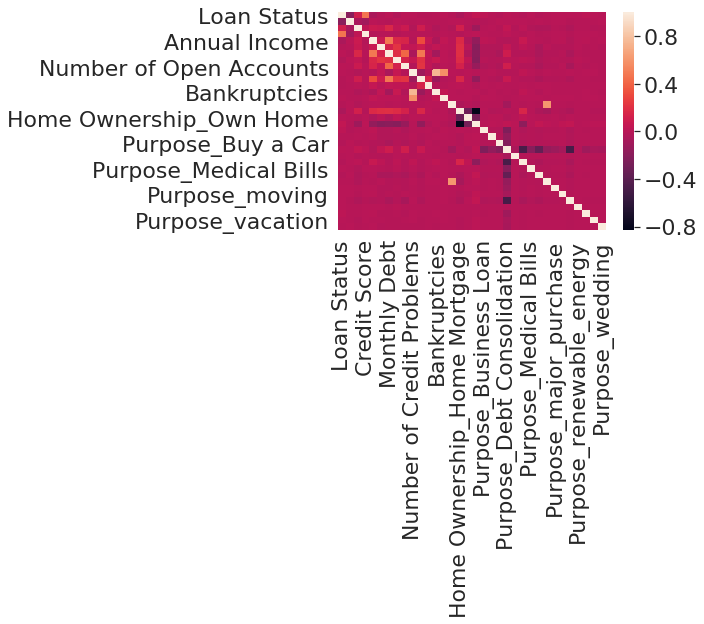

In [64]:
sns.heatmap(corr)

In [65]:
corr['Credit Score'][abs(corr['Credit Score']) > 0.1]

Loan Status     0.467328
Credit Score    1.000000
Name: Credit Score, dtype: float64

In [66]:
corr['Annual Income'][abs(corr['Annual Income']) > 0.1]

Annual Income                   1.000000
Monthly Debt                    0.485230
Years of Credit History         0.161669
Number of Open Accounts         0.146175
Current Credit Balance          0.312340
Home Ownership_Home Mortgage    0.176667
Home Ownership_Rent            -0.155203
Name: Annual Income, dtype: float64

In [67]:
corr['Years in current job'][abs(corr['Years in current job']) > 0.1]

Years in current job            1.000000
Monthly Debt                    0.130790
Years of Credit History         0.224946
Home Ownership_Home Mortgage    0.197959
Home Ownership_Rent            -0.206457
Name: Years in current job, dtype: float64

In [68]:
corr['Bankruptcies'][abs(corr['Bankruptcies']) > 0.1]

Number of Credit Problems    0.752942
Current Credit Balance      -0.122603
Bankruptcies                 1.000000
Name: Bankruptcies, dtype: float64

In [69]:
corr['Tax Liens'][abs(corr['Tax Liens']) > 0.1]

Number of Credit Problems    0.58129
Tax Liens                    1.00000
Name: Tax Liens, dtype: float64

In [70]:
corr['Maximum Open Credit'][abs(corr['Maximum Open Credit']) > 0.1]

Current Credit Balance    0.139204
Maximum Open Credit       1.000000
Name: Maximum Open Credit, dtype: float64

In [71]:
credit_without_mv = credit.dropna()

In [72]:
x1_col = ['Loan Status']
y1 = credit_without_mv['Credit Score']
x1 = credit_without_mv['Loan Status']

In [73]:
y1 = y1.values.reshape(77271,1)
x1 = x1.values.reshape(77271,1)

In [74]:
linreg1 = LinearRegression()
linreg1.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
credit['Credit Score'] = credit.apply(lambda x:linreg1.predict(x['Loan Status'].reshape(1,1))[0][0] if np.isnan(x['Credit Score']) else x['Credit Score'], axis =1)

In [76]:
credit['Credit Score'].shape

(100000,)

In [77]:
# for Annual income

x2_col = ['Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Current Credit Balance', 'Home Ownership_Home Mortgage', 'Home Ownership_Rent']
y2 = credit_without_mv['Annual Income']
x2 = credit_without_mv[x2_col]
y2 = y2.values.reshape(77271,1)
x2 = x2.values.reshape(77271,6)
linreg2 = LinearRegression()
linreg2.fit(x2,y2)
credit['Annual Income'] = credit.apply(lambda x:linreg2.predict(x[x2_col].values.reshape(1,6))[0][0] if np.isnan(x['Annual Income']) else x['Annual Income'], axis =1)
credit['Annual Income'].shape

(100000,)

In [78]:
# for Years in current job

x3_col = ['Monthly Debt', 'Years of Credit History', 'Home Ownership_Home Mortgage', 'Home Ownership_Rent']
y3 = credit_without_mv['Years in current job']
x3 = credit_without_mv[x3_col]
y3 = y3.values.reshape(77271,1)
x3 = x3.values.reshape(77271,4)
linreg3 = LogisticRegression()
linreg3.fit(x3,y3)
credit['Years in current job'] = credit.apply(lambda x:linreg3.predict(x[x3_col].values.reshape(1,4))[0:4][0] if np.isnan(x['Years in current job']) else x['Years in current job'], axis =1)
credit['Years in current job'].shape

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(100000,)

In [79]:
# for Maximum Open Credit

y4 = credit_without_mv['Maximum Open Credit']
x4 = credit_without_mv['Current Credit Balance']
y4 = y4.values.reshape(77271,1)
x4 = x4.values.reshape(77271,1)
linreg4 = LinearRegression()
linreg4.fit(x4,y4)
credit['Maximum Open Credit'] = credit.apply(lambda x:linreg4.predict(x['Current Credit Balance'].reshape(1,1))[0][0] if np.isnan(x['Maximum Open Credit']) else x['Maximum Open Credit'], axis =1)
credit['Maximum Open Credit'].shape

(100000,)

In [80]:
# for Bankruptcies

x5_col = ['Current Credit Balance', 'Number of Credit Problems']
y5 = credit_without_mv['Bankruptcies']
x5 = credit_without_mv[x5_col]
y5 = y5.values.reshape(77271,1)
x5 = x5.values.reshape(77271,2)
linreg5 = LinearRegression()
linreg5.fit(x5,y5)
credit['Bankruptcies'] = credit.apply(lambda x:linreg5.predict(x[x5_col].values.reshape(1,2))[0][0] if np.isnan(x['Bankruptcies']) else x['Bankruptcies'], axis =1)
credit['Bankruptcies'].shape

(100000,)

In [81]:
# for tax liens

y6 = credit_without_mv['Tax Liens']
x6 = credit_without_mv['Number of Credit Problems']
y6 = y6.values.reshape(77271,1)
x6 = x6.values.reshape(77271,1)
linreg6 = LinearRegression()
linreg6.fit(x6,y6)
credit['Tax Liens'] = credit.apply(lambda x:linreg6.predict(x['Number of Credit Problems'].reshape(1,1))[0][0] if np.isnan(x['Tax Liens']) else x['Tax Liens'], axis =1)
credit['Tax Liens'].shape

(100000,)

**End handling missing value using correlation**

**Start under sampling**

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import math

def generate_model_report(y_actual, y_predicted):
    
    conf_mat = confusion_matrix(y_actual, y_predicted) 
    true_positive = conf_mat[1,1]
    true_negative = conf_mat[0,0]
    false_positive = conf_mat[0,1]
    false_negative = conf_mat[1,0]
    specificity = (true_negative)/(true_negative + false_positive)
    gm = math.sqrt(specificity * recall_score(y_actual, y_predicted))
    
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall/Sensitivity = " ,recall_score(y_actual, y_predicted))
    print("Specificity = " ,specificity)
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    print("ROC-AUC Score = " ,roc_auc_score(y_actual, y_predicted))
    print("G-Measure = " ,gm)
    
    sns.heatmap(conf_mat,cmap="coolwarm_r", annot=True,linewidths=0.5,fmt='g')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted value")
    plt.ylabel("Actual label")
    plt.show()
    pass

minority_class_len = len(credit[credit['Loan Status'] == 1])
print(minority_class_len)

majority_class_indices = credit[credit['Loan Status'] == 0].index
print(majority_class_indices)

random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))

minority_class_indices = credit[credit['Loan Status'] == 1].index
print(minority_class_indices)

under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])
#under_sample = data_without_ms.loc[under_sample_indices]
credit = credit.loc[under_sample_indices]


22639
Int64Index([    0,     1,     2,     3,     4,     6,     8,     9,    10,
               11,
            ...
            99990, 99991, 99992, 99993, 99994, 99995, 99996, 99997, 99998,
            99999],
           dtype='int64', length=77361)
22639
Int64Index([    5,     7,    16,    20,    22,    32,    38,    40,    43,
               49,
            ...
            99944, 99947, 99950, 99954, 99960, 99963, 99975, 99981, 99988,
            99989],
           dtype='int64', length=22639)


In [83]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy =  0.6915856890459364
Precision =  0.6755555555555556
Recall/Sensitivity =  0.7380269256234827
Specificity =  0.6450828729281768
F1 Score =  0.7054108216432866
ROC-AUC Score =  0.6915548992758298
G-Measure =  0.6899916879785916


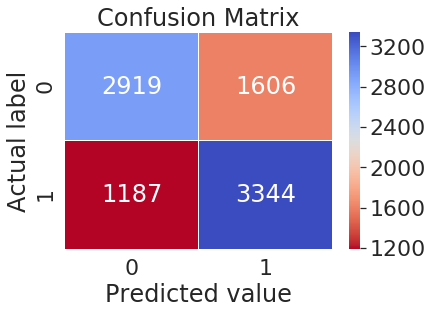

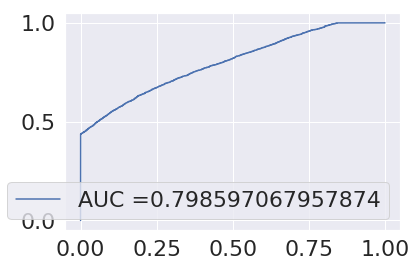

In [84]:
X = credit.loc[:, credit.columns!='Loan Status']
Y = credit.loc[:, credit.columns=='Loan Status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf = LogisticRegression().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)
generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)

KNN


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Accuracy =  0.5801678445229682
Precision =  0.5769149609622283
Recall/Sensitivity =  0.6033988082101082
Specificity =  0.5569060773480663
F1 Score =  0.5898597626752967
ROC-AUC Score =  0.5801524427790872
G-Measure =  0.5796865216276721


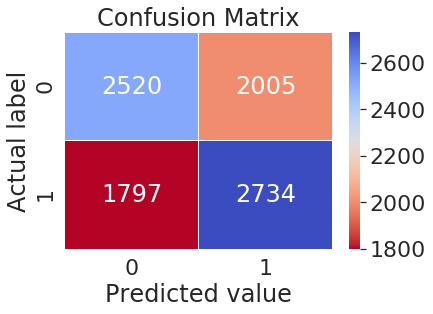

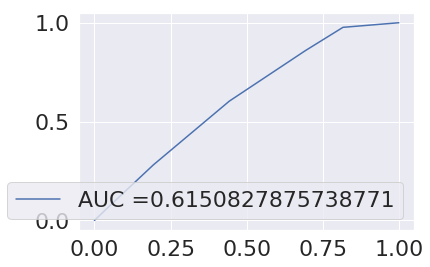

In [85]:
from sklearn.neighbors import KNeighborsClassifier
print("KNN")

clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, Y_train)

Y_Test_Pred = clf.predict(X_test)

generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)

Decision Tree
Accuracy =  0.729571554770318
Precision =  0.7344594594594595
Recall/Sensitivity =  0.7197086735819908
Specificity =  0.7394475138121547
F1 Score =  0.7270092520343329
ROC-AUC Score =  0.7295780936970728
G-Measure =  0.7295113359977669


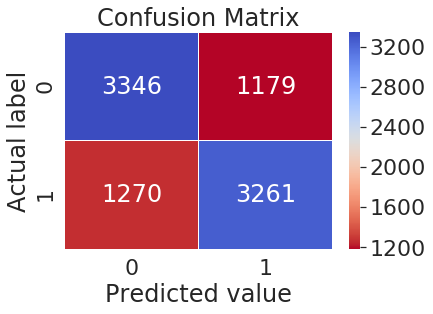

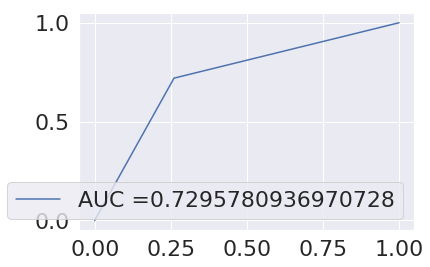

In [86]:
from sklearn import tree
print("Decision Tree")

clf = tree.DecisionTreeClassifier(random_state=1).fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)
generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)

Naive bayes
Accuracy =  0.5813825088339223
Precision =  0.5446751992272398
Recall/Sensitivity =  0.9955859633634959
Specificity =  0.16662983425414366
F1 Score =  0.7041286193709515
ROC-AUC Score =  0.5811078988088197
G-Measure =  0.40730126940756184


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


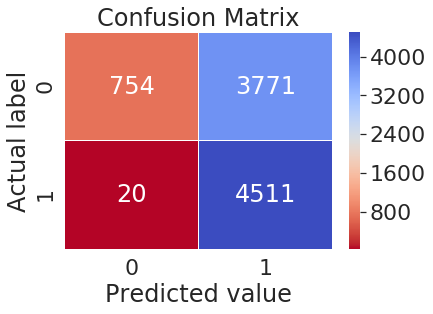

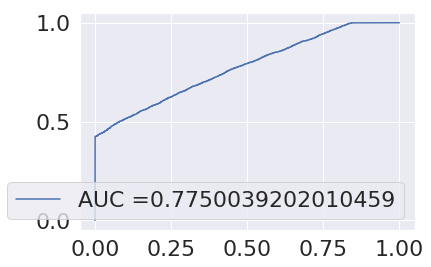

In [87]:
print("Naive bayes")
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)
generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)

Random forest


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy =  0.7384054770318021
Precision =  0.8026315789473685
Recall/Sensitivity =  0.6327521518428603
Specificity =  0.8441988950276244
F1 Score =  0.7076391459953105
ROC-AUC Score =  0.7384755234352423
G-Measure =  0.7308684337225779


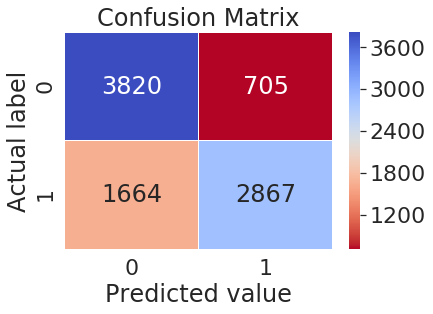

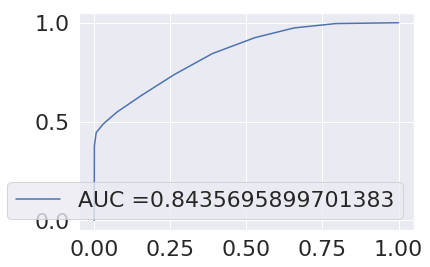

In [88]:
print("Random forest")
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy').fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)
generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)

XGBoost


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy =  0.7501104240282686
Precision =  0.8041845493562232
Recall/Sensitivity =  0.6616640918119621
Specificity =  0.8386740331491712
F1 Score =  0.7259958832788473
ROC-AUC Score =  0.7501690624805667
G-Measure =  0.7449298574160669


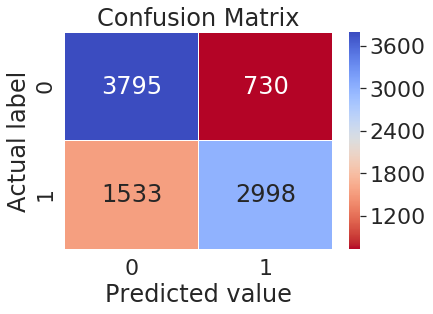

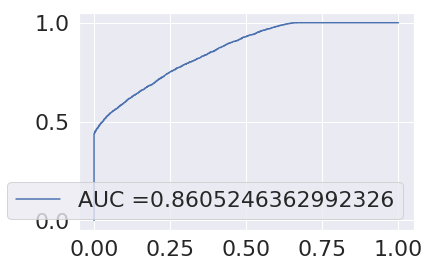

In [89]:
print("XGBoost")
from xgboost import XGBClassifier

clf = XGBClassifier().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)
generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)

In [90]:
# k-fold

In [91]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_train = LabelEncoder()
Y_train = labelencoder_y_train.fit_transform(Y_train)
labelencoder_y_test = LabelEncoder()
Y_test = labelencoder_y_test.fit_transform(Y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
# # # Models to Evaluate

# We will compare five different machine learning Classification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Naive Bayes
# 5 - Random Forest Classification

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
      
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 3, verbose = 2)
    return accuracies.mean()


def confusion_metrix(X_train, y_train, model):
    
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import f1_score, roc_auc_score, roc_curve
    import math
    
    ## confusion metrix 
    from sklearn.metrics import confusion_matrix
    y_pred = cross_val_predict(model, X_train, y_train, cv=3)
    conf_mat = confusion_matrix(y_train, y_pred) 
    true_positive = conf_mat[1,1]
    true_negative = conf_mat[0,0]
    false_positive = conf_mat[0,1]
    false_negative = conf_mat[1,0]
    specificity = (true_negative)/(true_negative + false_positive)
    gm = math.sqrt(specificity * recall_score(y_train, y_pred))
    
   

    print("Accuracy = " , accuracy_score(y_train, y_pred))
    print("Precision = " ,precision_score(y_train, y_pred))
    print("Recall/ Sensitivity = " ,recall_score(y_train, y_pred))
    print("Specificity = " ,specificity)
    print("F1 Score = " ,f1_score(y_train, y_pred))
    print("ROC-AUC Score = " ,roc_auc_score(y_train, y_pred))
    print("G-Measure = " ,gm)
    return conf_mat


# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    #model.fit(X_train, y_train)
    
    # Make predictions and evalute
    #model_pred = model.predict(X_test)
    model_acc_cross = cross_val(X_train, Y_train, model)
    print ("print accuracy is ",model_acc_cross)
    
    con_matrix = confusion_metrix(X_train, Y_train, model)
    print ("print confusion metrix is ",con_matrix)
    sns.heatmap(con_matrix,cmap="coolwarm_r", annot=True,linewidths=0.5,fmt='g')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted value")
    plt.ylabel("Actual label")
    plt.show()

    
    # Return the performance metric
    return model_acc_cross

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  ................................................................
[CV] ................................................. , total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................................. , total=   0.5s
[CV]  ................................................................


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................................. , total=   0.5s
print accuracy is  0.7270443376953232


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s finished
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy =  0.7270443376953233
Precision =  0.8476109936575053
Recall/ Sensitivity =  0.5535122597746852
Specificity =  0.9005189356298995
F1 Score =  0.6696956536264324
ROC-AUC Score =  0.7270155977022924
G-Measure =  0.7060086904779572
print confusion metrix is  [[16312  1802]
 [ 8085 10023]]


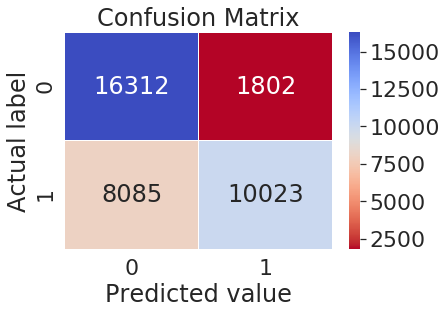

Logistic Regression Performance on the test set: Cross Validation Score = 0.7270


In [95]:
# # Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=  20.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.1s remaining:    0.0s


[CV] ................................................. , total=  19.5s
[CV]  ................................................................
[CV] ................................................. , total=  20.0s
print accuracy is  0.6857434708188395


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   59.6s finished


Accuracy =  0.6857434708188394
Precision =  0.7084237277629704
Recall/ Sensitivity =  0.6311574994477579
Specificity =  0.7403113613779397
F1 Score =  0.6675622791390438
ROC-AUC Score =  0.6857344304128489
G-Measure =  0.683559117896957
print confusion metrix is  [[13410  4704]
 [ 6679 11429]]


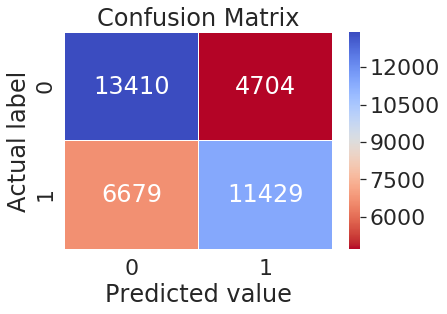

KNN Performance on the test set: Cross Validation Score = 0.6857


In [96]:
# # K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
print accuracy is  0.6554580089448402


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


Accuracy =  0.6554580089448402
Precision =  0.6280371280371281
Recall/ Sensitivity =  0.762259774685222
Specificity =  0.5486916197416363
F1 Score =  0.6886693608741207
ROC-AUC Score =  0.6554756972134291
G-Measure =  0.6467190660835114
print confusion metrix is  [[ 9939  8175]
 [ 4305 13803]]


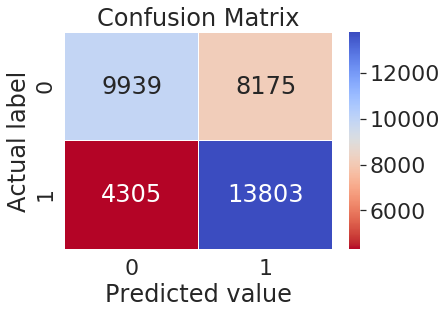

Naive Bayes Performance on the test set: Cross Validation Score = 0.6555


In [97]:
# # Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   0.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ................................................. , total=   0.8s
[CV]  ................................................................
[CV] ................................................. , total=   0.8s
print accuracy is  0.7348572690630003


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s finished


Accuracy =  0.7379769201038043
Precision =  0.8029674425145911
Recall/ Sensitivity =  0.63060525734482
Specificity =  0.8453130175554819
F1 Score =  0.7064245723653685
ROC-AUC Score =  0.737959137450151
G-Measure =  0.7301087816020987
print confusion metrix is  [[15312  2802]
 [ 6689 11419]]


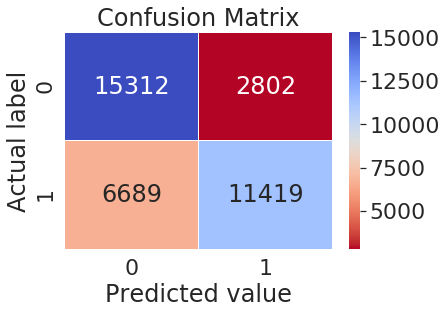

Random Forest Performance on the test set: Cross Validation Score = 0.7349


In [98]:
 # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   3.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV] ................................................. , total=   3.4s
[CV]  ................................................................
[CV] ................................................. , total=   3.4s
print accuracy is  0.7551764121252278


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.1s finished


Accuracy =  0.7551764121252278
Precision =  0.8070583543799016
Recall/ Sensitivity =  0.670587585597526
Specificity =  0.8397372198299657
F1 Score =  0.732520962779755
ROC-AUC Score =  0.7551624027137458
G-Measure =  0.7504114569902006
print confusion metrix is  [[15211  2903]
 [ 5965 12143]]


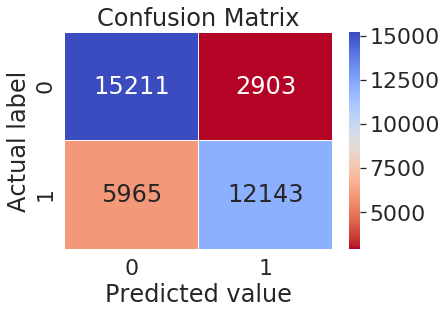

Gradiente Boosting Classification Performance on the test set: Cross Validation Score = 0.7552


In [99]:
# # Gradiente Boosting Classification
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.3s
print accuracy is  0.7227375628071337


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished


Accuracy =  0.7227375628071337
Precision =  0.7257712334135826
Recall/ Sensitivity =  0.715871438038436
Specificity =  0.7296014132715027
F1 Score =  0.7207873446578997
ROC-AUC Score =  0.7227364256549694
G-Measure =  0.7227038210176738
print confusion metrix is  [[13216  4898]
 [ 5145 12963]]


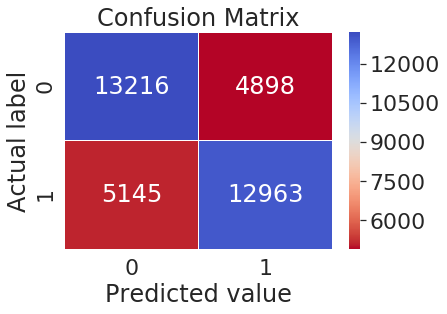

Decision tree Performance on the test set: Cross Validation Score = 0.7227


In [100]:
# # Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=1) 
dt_cross = fit_and_evaluate(dt)

print('Decision tree Performance on the test set: Cross Validation Score = %0.4f' % dt_cross)